<a href="https://colab.research.google.com/github/AlexZakharov1978/Inno/blob/main/DZ5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Подключаем ГуДиск


In [3]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


2. Импортируем бибилиотеки и грузим датасет

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
data=pd.read_csv('/content/drive/MyDrive/Datasets/Titanic-Dataset.csv')



In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


3. Подсчитываем количество пустых ячеек

In [6]:
k=data.isnull().sum().sum()
k

866

In [7]:
#data.dropna(inplace=True)
data
data.describe(include = "all")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Все колонки, кроме AGE CABIN EMBARKED содержат по 891 строке

In [21]:
# Посчитаем выживших
data['Survived'].value_counts()
# Заполним колонки возраст средним возрастом
data['Age'].fillna(data['Age'].mean(), inplace = True)

data['Embarked'].value_counts()
data['Embarked'].replace(np.nan, 'S', inplace = True)
data['Cabin'].replace(np.nan, 'XXX', inplace = True)
#print(data.info())
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,XXX,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,XXX,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,XXX,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,XXX,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,XXX,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


<Axes: xlabel='Age', ylabel='Survived'>

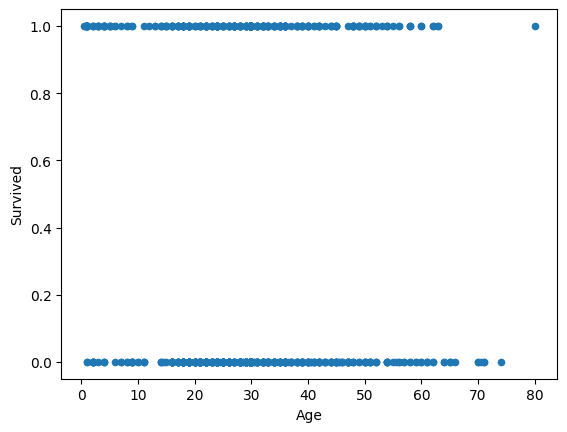

In [22]:
data.plot.scatter(x='Age',y='Survived')

In [24]:
data_age = data[['Age','Survived']]
data_age.describe()

,Age,Survived
count,891.000000,891.000000
mean,29.699118,0.383838
std,13.002015,0.486592
min,0.420000,0.000000
25%,22.000000,0.000000
50%,29.699118,0.000000
75%,35.000000,1.000000
max,80.000000,1.000000


AttributeError: ignored

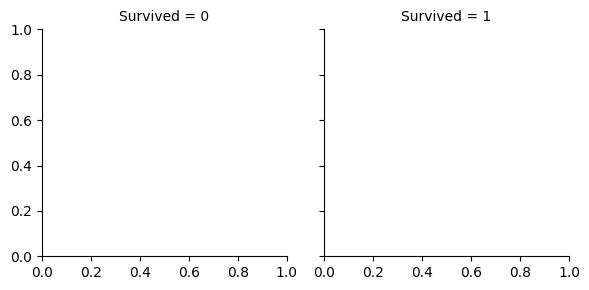

# Новый раздел